<a href="https://colab.research.google.com/github/khanhne28/BT_AI/blob/main/week9/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np

In [16]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Số này là : 3


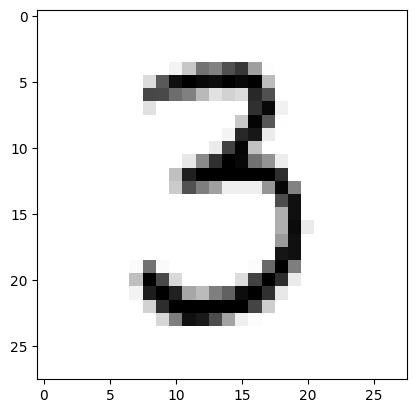

In [3]:
pic = train_images[50]
plt.imshow(pic, cmap=plt.cm.binary)
plt.show
print('Số này là :', train_labels[50])

<ipython-input-4-4534686060e7>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


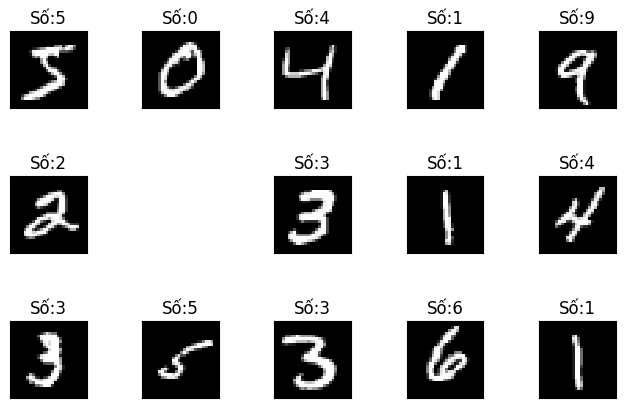

In [4]:
for i in range(15) :
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray', interpolation='none')
  plt.title('Số:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])
     

In [17]:
train_images = train_images.reshape((60000,28*28))   
train_images = train_images.astype('float32')/255    
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
print(train_labels)
print(test_labels)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,), name='Class1'))   #luôn khai báo lớp đầu tiên là (28*28,) : chỉ có 1 chiều
model.add(Dense(10, activation='softmax', name='Class2'))
model.summary()

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Class1 (Dense)              (None, 512)               401920    
                                                                 
 Class2 (Dense)              (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10,batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Do Chinh Xac tren tap kiem tra : ', test_acc)
print('Ham mat mat tren tap kiem tra : ', test_loss)

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2636 - accuracy: 0.9244
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1063 - accuracy: 0.9692
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0708 - accuracy: 0.9789
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0510 - accuracy: 0.9850
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0376 - accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0291 - accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0221 - accuracy: 0.9937
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0163 - accuracy: 0.9957
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0127 - accuracy: 0.9966
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0638 - accuracy: 

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [21]:
model.save('/content/gdrive/MyDrive/models/model_mnist.h5')

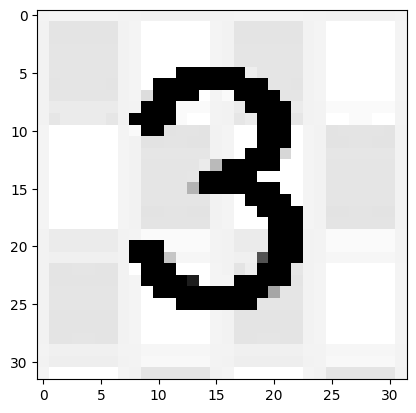

In [36]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
img = load_img('/content/gdrive/MyDrive/models/test_pics/so3.png', target_size=(32,32))
plt.imshow(img)

In [38]:
img = load_img('/content/gdrive/MyDrive/models/test_pics/so3.png',target_size=(28,28))
img = img_to_array(img)
img = img[:,:,0]
img = img.reshape(1,28*28)
img = img.astype('float32')/255
np.argmax(model.predict(img), axis=1)

1/1 [==============================] - 0s 59ms/step


array([3])